### Notebook for the fetal stem cells Visualizing and Clustering Gene Expression Trends with CellRank
- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 13th November 2023

### Import packages

In [1]:
import numpy as np
import pandas as pd

import cellrank as cr
import scanpy as sc
from cellrank.kernels import RealTimeKernel

from moscot.problems.time import TemporalProblem


In [2]:
import matplotlib.pyplot as plt

### Set up the cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()

sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

-----
anndata     0.10.3
scanpy      1.9.5
-----
PIL                         10.1.0
absl                        NA
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.1
brotli                      1.1.0
cellrank                    2.0.0
certifi                     2023.07.22
cffi                        1.16.0
charset_normalizer          3.3.2
chex                        0.1.83
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
docrep                      0.3.2
executing                   2.0.1
fastjsonschema              NA
flax                        0.6.1
fqdn                        NA
gmpy2

In [5]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

### Data Upload

In [10]:
# upload anndata file
input = 'FetalSC_data/Fetal_healthy_stem_cells_CellRank_experimental_time.h5ad'
adata = sc.read_h5ad(input)

In [11]:
adata

AnnData object with n_obs × n_vars = 7817 × 19868
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels', 'n_genes', 'n_counts', 'leiden', 'cluster', 'Development_Week', 'Development_Day', 'proliferation', 'apoptosis'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0', 'n_counts', 'n_cells'
    uns: 'Age_colors', 'Age_group_colors', 'Donor_ID_colors', 'Library_Preparation_Protocol_colors', 'Sex_colors', 'T_fwd_params', '_scvi_manager_uuid', '_scvi_uuid', 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap', '_scvi_extra_categoric

### Initialize an estimator

In [12]:
vk = cr.kernels.RealTimeKernel.from_adata(adata, key="T_fwd")

In [13]:
g = cr.estimators.GPCCA(vk)
print(g)

GPCCA[kernel=RealTimeKernel[n=7817], initial_states=None, terminal_states=None]


In [14]:
g.fit(cluster_key="cluster", n_states=[4, 12])

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Calculating minChi criterion in interval `[4, 12]`
Computing `6` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


GPCCA[kernel=RealTimeKernel[n=7817], initial_states=None, terminal_states=None]

In [15]:
g.predict_terminal_states()

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=RealTimeKernel[n=7817], initial_states=None, terminal_states=['Stem cells ASS1 SLC40A1_1', 'Stem cells ASS1 SLC40A1_3', 'Stem cells RPS10 RPS17_2']]

In [16]:
g.predict_initial_states(allow_overlap=True)

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


GPCCA[kernel=RealTimeKernel[n=7817], initial_states=['Stem cells ASS1 SLC40A1_4'], terminal_states=['Stem cells ASS1 SLC40A1_1', 'Stem cells ASS1 SLC40A1_3', 'Stem cells RPS10 RPS17_2']]

In [17]:
#print the estimator
g

GPCCA[kernel=RealTimeKernel[n=7817], initial_states=['Stem cells ASS1 SLC40A1_4'], terminal_states=['Stem cells ASS1 SLC40A1_1', 'Stem cells ASS1 SLC40A1_3', 'Stem cells RPS10 RPS17_2']]

Computing fate probabilities


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 35.33/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


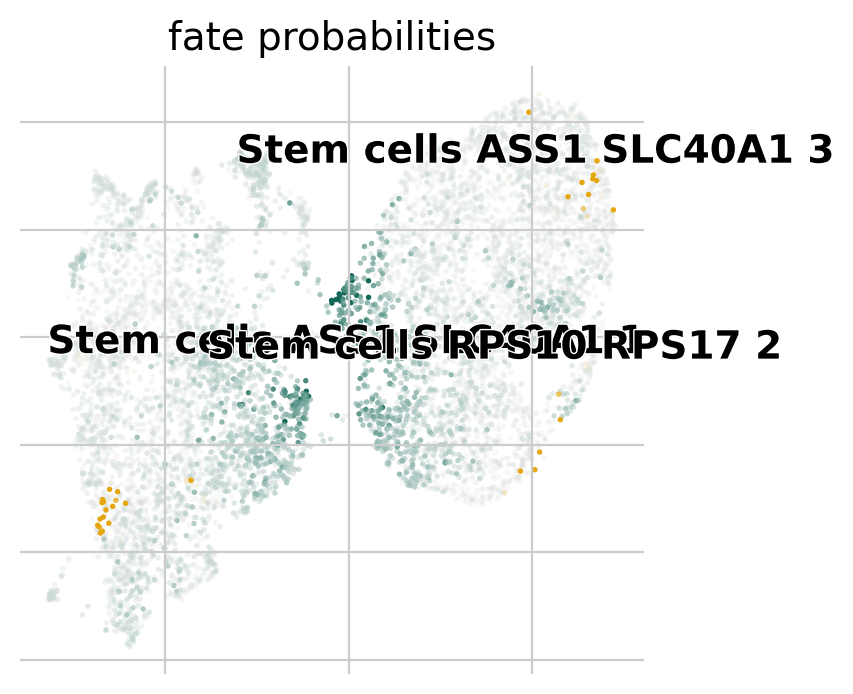

In [18]:
# compute and visualize fate probabilities
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=True)